# KNN (K- Nearest Neighbors) Algorithm

### 1. What is K- Nearest neighbors?
- It is Supervised machine learning algorithm as target variable is known.
- Non parametric as it does not make an assumption about the underlying data distribution pattern.
- It is Lazy algorithm as KNN does not have a training step. All data points will be used only at the time of prediction. 
- It Used for both Classification and Regression

### 2. What is K is K nearest neighbors?
- K is a number used to identify similar neighbors for the new data point.
- KNN takes K nearest neighbors to decide where the new data point with belong to. This decision is based on feature similarity.

### 3. How do we chose the value of K?
- We can evaluate accuracy of KNN classifier using K fold cross validation.
- Using Elbow Method To Find Right Value OF K.

### Before Going To Working of Knn I am showing you to all distance that Knn Use

### All Distance:
There are Three Types Of Distance
   - Euclidian Distance (L2 Norm)
   - Manhattan Distance (L1 Norm)
   - Minkowski Distance (Lp Norm)
   - Hamming Distance
   
###  Euclidian Distance (L2 Norm)
* Euclidean distance is the square root of the sum of squared distance between two points. It is also known as L2 norm.

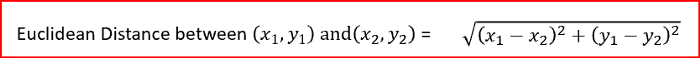


###  Manhattan Distance (L1 Norm)
* Manhattan distance is the sum of the absolute values of the differences between two points. Also known as L1 norm.

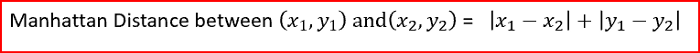


###  Minkowski Distance (Lp Norm)
* Minkowski distance is the used to find distance similarity between two points. When p=1, it becomes Manhattan distance and when p=2, it becomes Euclidean distance.

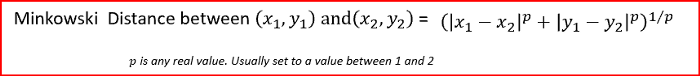


###  Hamming Distance
* Hamming distance is used for categorical variables. In simple terms it tells us if the two categorical variables are same or not.

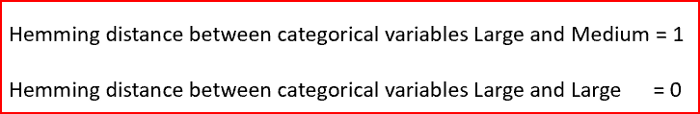

## 5. Now Discuss How does KNN work?

* Step 1: Choose a value for K. K should be an odd number.
* Step2: Find the distance of the new point to each of the training data.
* Step 3:Find the K nearest neighbors to the new data point.
* Step 4: 
     - For classification, count the number of data points in each category among the k neighbors. New data point will belong to class that has the most neighbors.
     - For regression, value for the new data point will be the average of the k neighbors.

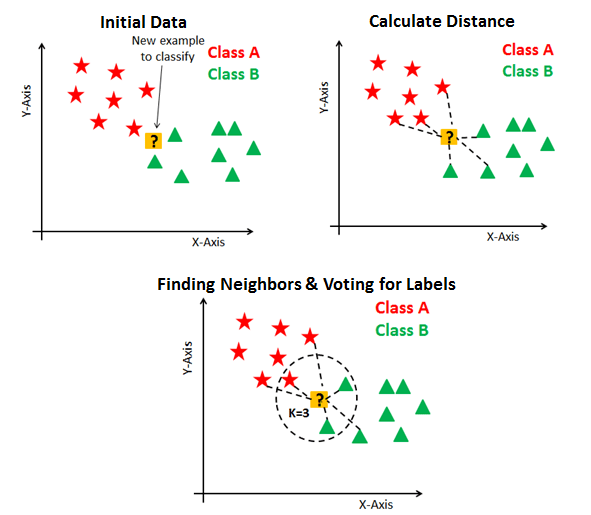

### Now See Some Pratical demonstration About KNN
- Here I Only Show Knn Use On Classification Problem.
- You Can Use KNN For Regression Problem Implementation Is same on both Case.

### Importing Libraries

In [ ]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [ ]:
data = pd.read_csv('data_cleaned.csv')
data.shape

In [ ]:
data.head()

### Segregating variables: Independent and Dependent Variables

In [ ]:
#seperating independent and dependent variables
x = data.drop(['Survived'], axis=1)
y = data['Survived']
x.shape, y.shape

### Scaling the data

In [ ]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [ ]:
x.head()

In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56, stratify=y)

### Implementing KNN Classifier

In [ ]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [ ]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10, metric='euclidean') #here use k=10

#See In metric We use all The above Distance To Calculate. here i Use euclidean distance . Here You Can Use any Three Distance.

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k_1 = f1_score(test_predict, test_y)

### Elbow for Finding K-Value

In [ ]:
## Function For Finding K-Value
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [ ]:
#Defining K range
k = range(6, 20, 2)

In [ ]:
# calling above defined function
test = Elbow(k)

In [ ]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

 - Here You See The Curve Down At 27 Then it goes up.
 - You need to choose the value of K When the graph never comes down.
 - And Always Take Odd Number For K.
 - Here I take K=27

In [ ]:
# Creating instance of KNN
clf = KNN(n_neighbors = 27) #after find K-value by elbow method

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k_2 = f1_score(test_predict, test_y)

In [ ]:
print("Before Elbow Method Knn Score: ",k_1)
print("After Elbow Method to put right K-Value Knn Score: ",k_2)

 - See Here Before Randomly Put K Value The Score is not well. But After Doing Elbow Method And Find Appropriate K-Value Then the score increase to 75.
 - So Now you understood how imporatant K-Value For Knn Algorithm.
 - This All About Knn Algorithm